Simple logic:


*   load the GOOGLE
*   load the gadm data
*   load the city list

> GGOGLE data seems to be clean, with several columns describing different activities. 

> GADM data for france has 5 levels which have to be combined to create a logic, but inside the data there are join fields which can be used to create the hierarchical relations needed to go up and down in administravive levels.

> City Lists, there are two city lists; the first is the raw list coming from the main task, the second list is geocoded, this list will be used for the further processing of the movement data



In [ ]:
# packages to install:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive

# for geospatial operations on dataframes
!pip install pandas fiona shapely pyproj rtree pygeo

# 
!pip install osmnx

!pip install geopandas
from geopandas.tools import sjoin

#to solve for a geopandas error
!pip install matplotlib==3.1.3


     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 29.0 MB/s 
     |████████████████████████████████| 994 kB 50.7 MB/s 
     |████████████████████████████████| 578 kB 45.0 MB/s 
     |████████████████████████████████| 561 kB 41.4 MB/s 
     |████████████████████████████████| 546 kB 44.9 MB/s 
     |████████████████████████████████| 532 kB 41.1 MB/s 
ERROR: Could not find a version that satisfies the requirement pygeo (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3)
ERROR: No matching distribution found for pygeo
     |████████████████████████████████| 93 kB 1.7 MB/s 
  Using cached pyproj-3.1.0-cp37-cp37m-manylinux2010_x86_64.whl (6.6 MB)
     |████████████████████████████████| 62 kB 776 kB/s 
     |████████████████████████████████| 10.3 MB 8.5 MB/s 
  Using cached Rtree-0.9.7-cp37-cp37m-manylinux2010_x86_64.whl (994 kB)
     |████████████████████████████████| 994 kB 55.7 MB/s 
  Using cached Fiona-1.8.20-cp37-cp37m-manylinux1_x86_64.whl 

     |████████████████████████████████| 13.1 MB 93 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Libaries needed:
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline



In [ ]:
#Creating the structure:

# Coming from Task 1:
city_list_GDRIVE = "https://drive.google.com/file/d/17sCrw7sZNwT4yE4wHK94sboi4X90DYwq/view?usp=sharing"

# GeoLocated names:
city_names_GDRIVE = "https://drive.google.com/file/d/1KDLSRUkoJqu33lXXy2vx_ZJvsZsocD8L/view?usp=sharing"

# GOOGLE Mobility:
google_mobility20_GDRIVE = "https://drive.google.com/file/d/1sp9IDBUuijpOUsoC3VvF63FUN7nfBop0/view?usp=sharing"
google_mobility21_GDRIVE = "https://drive.google.com/file/d/1ucwNXHr4f11wcG7yvPE7CA67535FMbcA/view?usp=sharing"

# France Regions:
gadm36_FRA_shp_GDRIVE = "https://drive.google.com/file/d/1F_WAdvJQ4bYAMlmWCgdle9VOEoe40WRi/view?usp=sharing"

# Folder Structure
# root
# ../00_text
# ../01_shape

fldName_text = "00_text"
fldName_shape = "01_shape"

command = f"mkdir {fldName_text}"
os.system(command)

command = f"mkdir {fldName_shape}"
os.system(command)



0

<h1>Functions</h1>

In [ ]:
def getSharedFileID(shared_link):
  str1 = shared_link;
  str2 = "/";

  #print(str1.rindex(str2))
  x = str1.rindex(str2)
  print(str1[:x])
  link = str1[:x]

  x = link.rindex(str2)+1
  id = link[x:]
    
  return id



In [ ]:
def getZipFiles(id, zip_file, unzip_file):

  command = f"""wget --load-cookies /tmp/cookies.txt \
  "https://docs.google.com/uc?export=download&confirm=$(wget --quiet \
  --save-cookies /tmp/cookies.txt --keep-session-cookies \
  --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' \
  -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" \
  -O {zip_file} && rm -rf /tmp/cookies.txt"""

  #print(command)
  
  command2 = f"unzip {unzip_file}"

  res = os.system(command)
  if res == 0:
    print(command2)
    os.system(command2)
    
      #with open(zip_file) as f:
      #    response = f.read()
      #    # process response
  else:
      print('Command {!r} failed with exit code {}'.format(command, rv))

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
str1 = city_list_GDRIVE;
id = getSharedFileID(str1)

print (id) # Verify that you have everything after the last'/

https://drive.google.com/file/d/17sCrw7sZNwT4yE4wHK94sboi4X90DYwq
17sCrw7sZNwT4yE4wHK94sboi4X90DYwq


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('citynames.csv')  

df3 = pd.read_csv('citynames.csv', sep=",", header = None)

In [ ]:
df3 = pd.DataFrame(df3).T

In [ ]:
# cleaning up the strings

for i in range(0, len(df3)):
  s = df3.loc[i,0]

  str2 = "'";
  x = s.rindex(str2)
  s = s[2:x]              #storing the name without quotes 

  df3.loc[i,0] = s

df3.head()
# The problem with this list is that the names are
# - in the local characterset
# - have no geolocation (there are duplicated names in France)

,0
0,Tours
1,Marseille
2,Nîmes
3,Besançon
4,Nantes


In [ ]:
str1 = city_names_GDRIVE;
id = getSharedFileID(str1)

print (id) # Verify that you have everything after the last'/

https://drive.google.com/file/d/1KDLSRUkoJqu33lXXy2vx_ZJvsZsocD8L
1KDLSRUkoJqu33lXXy2vx_ZJvsZsocD8L


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('citynames.csv')  

command = f"cp citynames.csv 00_text/citynames.csv"
os.system(command)

csv_file = "citynames.csv"
command = f"rm {csv_file}"
os.system(command)



0

In [ ]:
 !ls 00_text/

df4 = pd.read_csv('00_text/citynames.csv', sep=",")

#df4 = pd.read_csv('/root/content/00_text/citynames.csv', sep=",")

citynames.csv


In [ ]:
#The translated geolocated cities:
df4.dropna(how='all', axis=1, inplace=True)
df4.head()

# With the help of The Gazetteer: https://www.diva-gis.org/Data the missing 
# coordinates are found and the LocalName is translated to an English format

,NAME,LocalName,LAT,LONG,ADM1,ADM2
0,Amiens,Amiens,49.9000,2.3000,PICARDIE,SOMME
1,Besaneon,Besançon,47.2500,6.0333,FRANCHE-COMTE,DOUBS
2,Bordeaux,Bordeaux,44.8333,-0.5666,AQUITAINE,GIRONDE
3,Caen,Caen,49.1833,-0.3500,BASSE-NORMANDIE,CALVADOS
4,Clermont-Ferrand,Clermont-Ferrand,45.7833,3.0833,AUVERGNE,PUY-DE-DOME


In [ ]:
#Removing any leading spaces
for i, col in enumerate(df4.columns):
    col = col.strip()
    print(col)
    df4 = df4.rename(columns={df4.columns[i]: col})

#Clean column headers:

NAME
LocalName
LAT
LONG
ADM1
ADM2


Loading the GOOGLE data as csv - this is a single file from the download on: https://www.google.com/covid19/mobility/ 

REGION files: https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

In [ ]:
str1 = google_mobility20_GDRIVE;
id_GOOGLE = getSharedFileID(str1)
print (id_GOOGLE) # Verify that you have everything after the last'/


https://drive.google.com/file/d/1sp9IDBUuijpOUsoC3VvF63FUN7nfBop0
1sp9IDBUuijpOUsoC3VvF63FUN7nfBop0


In [ ]:
downloaded = drive.CreateFile({'id':id_GOOGLE}) 
downloaded.GetContentFile('2020_FR_Region_Mobility_Report.csv')  

command = f"cp 2020_FR_Region_Mobility_Report.csv 00_text/2020_FR_Region_Mobility_Report.csv"
os.system(command)

csv_file = "2020_FR_Region_Mobility_Report.csv"
command = f"rm {csv_file}"
os.system(command)

0

In [ ]:
str1 = google_mobility21_GDRIVE;
id_GOOGLE = getSharedFileID(str1)
print (id_GOOGLE) # Verify that you have everything after the last'/

downloaded = drive.CreateFile({'id':id_GOOGLE}) 
downloaded.GetContentFile('2021_FR_Region_Mobility_Report.csv')  

command = f"cp 2021_FR_Region_Mobility_Report.csv 00_text/2021_FR_Region_Mobility_Report.csv"
os.system(command)

csv_file = "2021_FR_Region_Mobility_Report.csv"
command = f"rm {csv_file}"
os.system(command)






https://drive.google.com/file/d/1ucwNXHr4f11wcG7yvPE7CA67535FMbcA
1ucwNXHr4f11wcG7yvPE7CA67535FMbcA


0

In [ ]:
#gadm36_FRA_shp_GDRIVE

str1 = gadm36_FRA_shp_GDRIVE;
id_gadm36_FRA = getSharedFileID(str1)
print (id_gadm36_FRA) # Verify that you have everything after the last'/

https://drive.google.com/file/d/1F_WAdvJQ4bYAMlmWCgdle9VOEoe40WRi
1F_WAdvJQ4bYAMlmWCgdle9VOEoe40WRi


In [ ]:
id = id_gadm36_FRA
zip_file = "gadm36_FRA.zip"
unzip_dir = "01_shape/gadm36_FRA"

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(zip_file)

command = f"unzip {zip_file} -d {unzip_dir}"
os.system(command)

#CleanUp
command = f"rm {zip_file}"
os.system(command)

0

Next steps, create a geopandas dataframe from the coordinate list

In [ ]:
!ls 00_text/

strPath = "00_text/"
strFile = "2020_FR_Region_Mobility_Report.csv"

df5 = pd.read_csv(strPath + strFile, sep=',')

strFile = "2021_FR_Region_Mobility_Report.csv"

df6 = pd.read_csv(strPath + strFile, sep=',')

2020_FR_Region_Mobility_Report.csv  citynames.csv
2021_FR_Region_Mobility_Report.csv


In [ ]:
df5.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-15,-2.0,-1.0,23.0,12.0,-2.0,-1.0
1,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-16,6.0,2.0,9.0,7.0,-1.0,-1.0
2,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-17,1.0,2.0,16.0,-6.0,-15.0,4.0
3,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-18,5.0,2.0,36.0,-4.0,-14.0,3.0
4,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2020-02-19,-4.0,-3.0,18.0,-6.0,-12.0,2.0


In [ ]:
# iso_3166_2_code
FRA_df5 = df5[df5.iso_3166_2_code.notnull()]

#FRA_df5 = df5[df5['country'] == "FRA"]
FRA_df5.head()

FRA_df6 = df6[df6.iso_3166_2_code.notnull()]

In [ ]:
FRA_df6['iso_3166_2_code'].unique()

#The Departments (13)

array(['FR-ARA', 'FR-01', 'FR-03', 'FR-07', 'FR-15', 'FR-26', 'FR-43',
       'FR-74', 'FR-38', 'FR-42', 'FR-63', 'FR-69', 'FR-73', 'FR-BFC',
       'FR-21', 'FR-25', 'FR-70', 'FR-39', 'FR-58', 'FR-71', 'FR-90',
       'FR-89', 'FR-BRE', 'FR-22', 'FR-29', 'FR-35', 'FR-56', 'FR-CVL',
       'FR-18', 'FR-28', 'FR-36', 'FR-37', 'FR-41', 'FR-45', 'FR-COR',
       'FR-2A', 'FR-2B', 'FR-GES', 'FR-08', 'FR-10', 'FR-67', 'FR-68',
       'FR-52', 'FR-51', 'FR-54', 'FR-55', 'FR-57', 'FR-88', 'FR-HDF',
       'FR-02', 'FR-59', 'FR-60', 'FR-62', 'FR-80', 'FR-IDF', 'FR-91',
       'FR-92', 'FR-75', 'FR-77', 'FR-93', 'FR-95', 'FR-94', 'FR-78',
       'FR-NOR', 'FR-14', 'FR-27', 'FR-50', 'FR-61', 'FR-76', 'FR-NAQ',
       'FR-16', 'FR-17', 'FR-19', 'FR-23', 'FR-79', 'FR-24', 'FR-33',
       'FR-87', 'FR-40', 'FR-47', 'FR-64', 'FR-86', 'FR-OCC', 'FR-09',
       'FR-11', 'FR-12', 'FR-30', 'FR-32', 'FR-31', 'FR-65', 'FR-34',
       'FR-46', 'FR-48', 'FR-66', 'FR-81', 'FR-82', 'FR-PDL', 'FR-44',
       '

In [ ]:
print(len(FRA_df5))
print(len(FRA_df6))

#Total Records

34978
22781


Show a map

In [ ]:
!ls 01_shape/gadm36_FRA

strPath = "01_shape/gadm36_FRA/"
strFRA_0 = "gadm36_FRA_0.shp"
strFRA_2 = "gadm36_FRA_2.shp"

gdf_FRA_0 = gpd.read_file(strPath + strFRA_0)
gdf_FRA_2 = gpd.read_file(strPath + strFRA_2)

# Available GIS polygon layers for France 

gadm36_FRA_0.cpg  gadm36_FRA_1.shp  gadm36_FRA_3.dbf  gadm36_FRA_4.shx
gadm36_FRA_0.dbf  gadm36_FRA_1.shx  gadm36_FRA_3.prj  gadm36_FRA_5.cpg
gadm36_FRA_0.prj  gadm36_FRA_2.cpg  gadm36_FRA_3.shp  gadm36_FRA_5.dbf
gadm36_FRA_0.shp  gadm36_FRA_2.dbf  gadm36_FRA_3.shx  gadm36_FRA_5.prj
gadm36_FRA_0.shx  gadm36_FRA_2.prj  gadm36_FRA_4.cpg  gadm36_FRA_5.shp
gadm36_FRA_1.cpg  gadm36_FRA_2.shp  gadm36_FRA_4.dbf  gadm36_FRA_5.shx
gadm36_FRA_1.dbf  gadm36_FRA_2.shx  gadm36_FRA_4.prj  license.txt
gadm36_FRA_1.prj  gadm36_FRA_3.cpg  gadm36_FRA_4.shp


In [ ]:
gdf_FRA_2.head()

# GID_2 is matching the 'iso_3166_2_code' of the Google data, 
# but the format is not the same

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.1_1,Ain,None,None,Département,Department,01,FR.AI,"POLYGON ((5.25563 45.78431, 5.24020 45.77737, ..."
1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.2_1,Allier,Basses-Alpes,None,Département,Department,03,FR.AL,"POLYGON ((2.38608 46.33197, 2.37061 46.31272, ..."
2,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.3_1,Ardèche,None,None,Département,Department,07,FR.AH,"POLYGON ((4.23405 44.27506, 4.21638 44.28904, ..."
3,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.4_1,Cantal,None,None,Département,Department,15,FR.CL,"POLYGON ((2.85493 44.87431, 2.85140 44.87195, ..."
4,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,FRA.1.5_1,Drôme,None,None,Département,Department,26,FR.DM,"POLYGON ((4.81214 44.24206, 4.81251 44.25802, ..."


In [ ]:
gdf_FRA_2['CC_2'].unique()

array(['01', '03', '07', '15', '26', '43', '74', '38', '42', '63', '69',
       '73', '21', '25', '70', '39', '58', '71', '90', '89', '22', '29',
       '35', '56', '18', '28', '36', '37', '41', '45', '2A', '2B', '08',
       '10', '67', '68', '52', '51', '54', '55', '57', '88', '02', '59',
       '60', '62', '80', '91', '92', '75', '77', '93', '95', '94', '78',
       '14', '27', '50', '61', '76', '16', '17', '19', '23', '79', '24',
       '33', '87', '40', '47', '64', '86', '09', '11', '12', '30', '32',
       '31', '65', '34', '46', '48', '66', '81', '82', '44', '49', '53',
       '72', '85', '04', '06', '13', '05', '83', '84'], dtype=object)

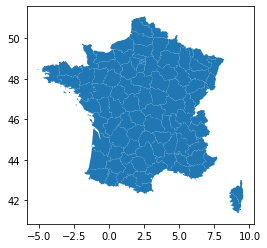

In [ ]:
#!pip install matplotlib==3.1.3
gdf_FRA_2.plot();

The code in the geopandas dataframe is matching the code in the mobility dataset, so we can assign a mobility value to the polygons in the map. We also can find in which department the cities are located, and perhaps use a ratio (population) to say which city was more contributing to the mobility in the region.

In [ ]:
df4.head()
#Showing the list of cities again:

,NAME,LocalName,LAT,LONG,ADM1,ADM2
0,Amiens,Amiens,49.9000,2.3000,PICARDIE,SOMME
1,Besaneon,Besançon,47.2500,6.0333,FRANCHE-COMTE,DOUBS
2,Bordeaux,Bordeaux,44.8333,-0.5666,AQUITAINE,GIRONDE
3,Caen,Caen,49.1833,-0.3500,BASSE-NORMANDIE,CALVADOS
4,Clermont-Ferrand,Clermont-Ferrand,45.7833,3.0833,AUVERGNE,PUY-DE-DOME


In [ ]:
gdf_cities = gpd.GeoDataFrame(
    df4, geometry=gpd.points_from_xy(df4.LONG, df4.LAT))
gdf_cities = gdf_cities.set_crs("EPSG:4326")

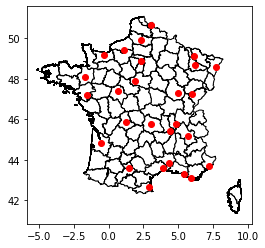

In [ ]:
ax = gdf_FRA_2.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_cities.plot(ax=ax, color='red')

plt.show()

In [ ]:
#Combining the two tables: cities and regions:
join_cities_df = sjoin(gdf_cities, gdf_FRA_2, how="left")

# Cleaning up the datafram, and only keeping: 
# index, Name, LocalName, GID_1 columns and the geometry:
join_cities_df.drop(join_cities_df.columns.difference(['NAME', 'LocalName', 'geometry', 'GID_2', 'CC_2']), 1, inplace=True)
join_cities_df.head()


,NAME,LocalName,geometry,GID_2,CC_2
0,Amiens,Amiens,POINT (2.30000 49.90000),FRA.7.5_1,80
1,Besaneon,Besançon,POINT (6.03330 47.25000),FRA.2.2_1,25
2,Bordeaux,Bordeaux,POINT (-0.56660 44.83330),FRA.10.7_1,33
3,Caen,Caen,POINT (-0.35000 49.18330),FRA.9.1_1,14
4,Clermont-Ferrand,Clermont-Ferrand,POINT (3.08330 45.78330),FRA.1.10_1,63


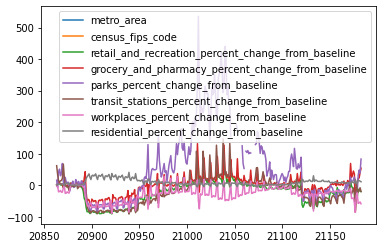

In [ ]:
#FRA_df5 = df5[df5['country'] == "FRA"]
#FRA_df5.head()
tmp_FRA_df5 = FRA_df5[FRA_df5['iso_3166_2_code'] == "FR-14"]
len(tmp_FRA_df5)
tmp_FRA_df5.plot()

In [ ]:
join_cities_df["CC_id"]= "FR-" + join_cities_df["CC_2"].astype(str)
regions = join_cities_df['CC_id'].unique()
regions



array(['FR-80', 'FR-25', 'FR-33', 'FR-14', 'FR-63', 'FR-21', 'FR-38',
       'FR-59', 'FR-87', 'FR-69', 'FR-13', 'FR-57', 'FR-34', 'FR-54',
       'FR-44', 'FR-06', 'FR-30', 'FR-45', 'FR-75', 'FR-66', 'FR-35',
       'FR-76', 'FR-42', 'FR-67', 'FR-nan', 'FR-31', 'FR-37'],
      dtype=object)

In [ ]:
tmp_FRA_df5 = FRA_df5[FRA_df5['iso_3166_2_code'].isin(regions)]
tmp_FRA_df5.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2889,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2020-02-15,2.0,3.0,58.0,31.0,2.0,-1.0
2890,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2020-02-16,16.0,15.0,57.0,6.0,1.0,-1.0
2891,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2020-02-17,3.0,2.0,27.0,6.0,1.0,2.0
2892,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2020-02-18,9.0,6.0,56.0,4.0,2.0,0.0
2893,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2020-02-19,0.0,2.0,11.0,1.0,1.0,1.0


In [ ]:
tmp_FRA_df6 = FRA_df6[FRA_df6['iso_3166_2_code'].isin(regions)]
tmp_FRA_df6.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1881,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2021-01-01,-84.0,-88.0,-26.0,-72.0,-88,27.0
1882,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2021-01-02,-50.0,-14.0,-38.0,-45.0,-34,11.0
1883,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2021-01-03,-53.0,-15.0,-34.0,-41.0,-21,7.0
1884,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2021-01-04,-38.0,-2.0,-28.0,-29.0,-27,12.0
1885,FR,France,Auvergne-Rhône-Alpes,Isere,NaN,FR-38,NaN,ChIJh1d4BM_oikcR4Ce55CqrCAM,2021-01-05,-36.0,2.0,-27.0,-31.0,-26,12.0


In [ ]:
FRA_Google_mob = pd.concat([tmp_FRA_df5, tmp_FRA_df6], ignore_index=True)
FRA_Google_mob.to_csv("FRA_Google_mob.txt", sep='\t')

join_cities_df.to_csv("FRA_Google_city.txt", sep='\t')

In [ ]:
from google.colab import files
files.download("FRA_Google_mob.txt")
files.download("FRA_Google_city.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>